In [13]:
using StatsBase, Gadfly, Distributions, HypothesisTests

In [14]:
function samplestrap(data, n; coverage = .95)
    q = length(data)
    res = zeros(Float64, n)
    for j = 1:n
        res[j] = mean(sample(data, q, replace = true))
    end
    α = (1 - coverage) / 2
    sort!(res)
    (res, [res[floor(α * n)], res[ceil((1 - α) * n)]], minimum(res), maximum(res), mean(res))
end

samplestrap (generic function with 1 method)

In [15]:
data = rand(Exponential(), 100)

100-element Array{Float64,1}:
 0.669745 
 1.29676  
 0.230052 
 0.539175 
 0.740122 
 0.328946 
 0.338086 
 2.03707  
 0.711515 
 0.272891 
 0.783648 
 0.173739 
 3.40878  
 ⋮        
 0.0549537
 0.999956 
 0.120956 
 0.194438 
 2.06277  
 0.310073 
 2.31722  
 1.15703  
 0.154107 
 0.774564 
 1.13276  
 1.3581   

In [16]:
OneSampleTTest(data[:,1])

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.9736421564315481
    95% confidence interval: (0.7799851167638348,1.1672991960992614)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           1.234303395854246e-16 (extremely significant)

Details:
    number of observations:   100
    t-statistic:              9.975972342061588
    degrees of freedom:       99
    empirical standard error: 0.09759872251513677


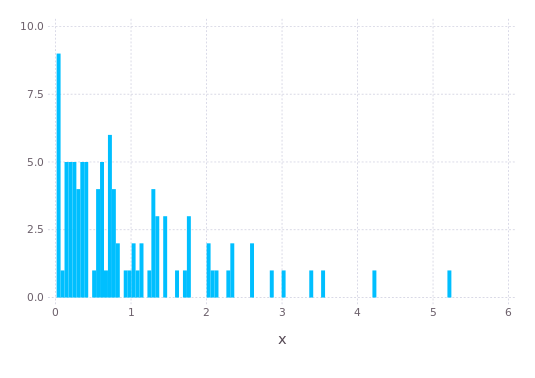

In [17]:
plot(x = data, Geom.histogram) 

In [18]:
(samples, interval, min, max, mean) = samplestrap(data, 100000, coverage = .95);

LoadError: type: __samplestrap#81__: in apply, expected Function, got Float64
while loading In[18], in expression starting on line 1

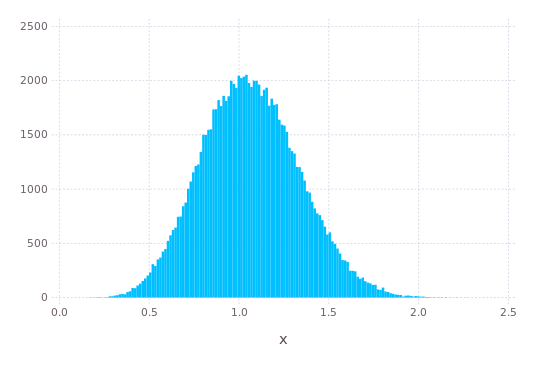

In [19]:
plot(x = samples, Geom.histogram)

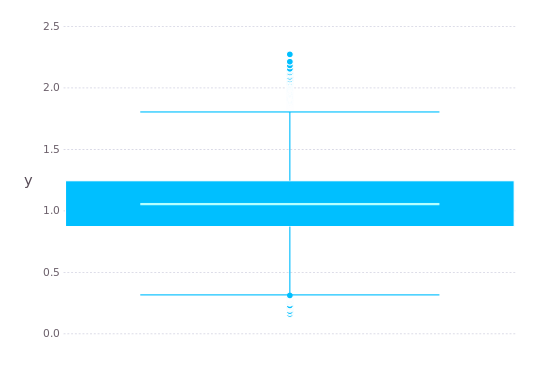

In [20]:
plot(y = samples, Geom.boxplot)

In [21]:
interval

2-element Array{Float64,1}:
 0.558902
 1.61652 

In [22]:
min

0.16154855626489062

In [23]:
max

2.2729330313047504

In [24]:
mean

1.0644011423866